In [1]:
!pip install --quiet gdown  # Install the 'gdown' package quietly (used to download files from Google Drive)

import gdown #gdown module to handle downloading files from Google Drive
import numpy as np#NumPy for numerical operations
import pandas as pd#Pandas for data manipulation and analysis
import matplotlib.pyplot as plt#Matplotlib's Pyplot module for plotting graphs and visualizations
from sklearn.preprocessing import StandardScaler # StandardScaler for standardizing features (mean=0, variance=1)
from sklearn.model_selection import train_test_split# train_test_split to split data into training and test sets

In [2]:
file_id = '1Bd2e7j11pxE0lSittM6L2UqAl_cM4lrM'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'data.csv', quiet=False)


# Read the CSV file 'data.csv' into a pandas DataFrame called 'df'. Dataframe to store, manipulate, filter, and analyze data
df = pd.read_csv('data.csv')
df.head(10)

Downloading...
From: https://drive.google.com/uc?id=1Bd2e7j11pxE0lSittM6L2UqAl_cM4lrM
To: /content/data.csv
100%|██████████| 379k/379k [00:00<00:00, 6.60MB/s]


,user_id,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,...,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban
0,user_1,51,4.8,3.4,1.3,1.6,1.6,4.1,2,1,...,125.2,13,15,4,1,0,0,0,0,1
1,user_2,64,3.9,3.5,1.8,0.9,2,2.7,3.1,1,...,150.4,19,18,6.5,0,1,0,0,1,0
2,user_3,41,10.5,2.1,2.6,0.7,2.2,3,2.8,4.1,...,187.9,7,3,6.9,0,0,1,0,1,0
3,user_4,27,8.8,0,0,0.7,2.5,3.3,1.6,1.3,...,73.6,7,2,4.8,0,0,1,1,0,0
4,user_5,55,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,...,217.5,8,10,0,0,1,0,0,0,1
5,user_6,20,9.9,3.2,2.7,1.2,3.3,1.6,2.5,3.3,...,102.8,17,16,11.5,1,0,0,0,1,0
6,user_7,33,5.8,4,3.2,1.9,1.3,0.9,1.7,4.7,...,162.8,6,4,7.9,0,1,0,0,0,1
7,user_8,51,7.4,2.9,3,0.9,3.4,1.2,2.2,4,...,147.1,9,8,4.4,1,0,0,0,0,1
8,user_9,31,6,2.3,2.9,1.4,0.4,1.5,2.1,5.5,...,109.7,0,0,21.2,1,0,0,0,1,0
9,user_10,35,6.8,6.4,2.1,1.4,0.5,1.2,2.2,5.6,...,206.8,3,8,8.1,0,1,0,0,0,1


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("data.csv")

# Drop non-predictive columns
df = df.drop(columns=['user_id', 'location_type', 'gender', 'uses_wellness_apps'], errors='ignore')


# Convert to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN
df = df.dropna()

# Features & target
X = df.drop(columns=['mental_health_score']).values
y = df['mental_health_score'].values.reshape(-1, 1)

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


In [4]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (3200, 26) (3200, 1)
Test set shape: (800, 26) (800, 1)


WithOut l2 regularization


In [5]:
mlp_sgd = MLPRegressor(hidden_layer_sizes=(128,64),   ## 128 neurons in the first layer then 64 neurons in the next
                       activation='relu',
                       solver='sgd',
                       learning_rate_init=0.01,
                       batch_size=1,       # SGD
                       max_iter=2000,
                       random_state=42)

mlp_minibatch = MLPRegressor(hidden_layer_sizes=(128,64),
                             activation='relu',
                             solver='sgd',
                             learning_rate_init=0.01,
                             batch_size=32,   # Mini-batch
                             max_iter=2000,
                             random_state=42)

mlp_batch = MLPRegressor(hidden_layer_sizes=(128,64),
                         activation='relu',
                         solver='sgd',
                         learning_rate_init=0.01,
                         batch_size=X_train.shape[0],  # Batch
                         max_iter=2000,
                         random_state=42)

SGD -> R²: -0.2151 | MSE: 353.4935 | RMSE: 18.8014
Mini-batch -> R²: 0.5978 | MSE: 117.0183 | RMSE: 10.8175
Batch -> R²: 0.5240 | MSE: 138.4799 | RMSE: 11.7677


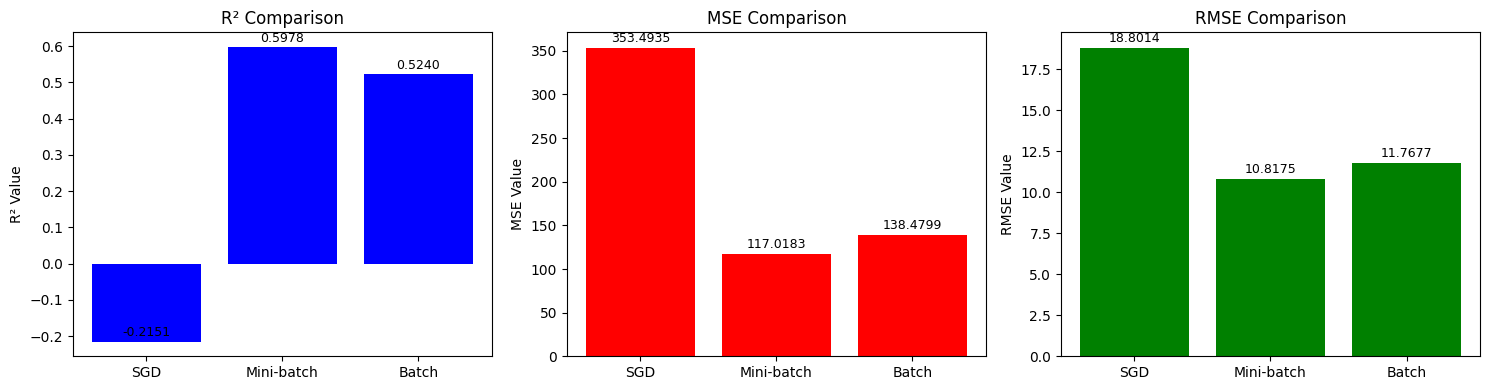

In [6]:
from sklearn.metrics import r2_score, mean_squared_error

# Lists to store metrics
model_names = []
r2_list = []
mse_list = []
rmse_list = []

for name, model in [("SGD", mlp_sgd), ("Mini-batch", mlp_minibatch), ("Batch", mlp_batch)]:
    # Train the model
    model.fit(X_train, y_train.ravel())

    # Predict on test set
    y_pred = scaler_y.inverse_transform(model.predict(X_test).reshape(-1,1))
    y_true = scaler_y.inverse_transform(y_test)

    # Metrics
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Store metrics
    model_names.append(name)
    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)

    print(f"{name} -> R²: {r2:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f}")

# Function to add values on top of bars
def add_values(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + max(values)*0.01, f"{v:.4f}", ha='center', va='bottom', fontsize=9)

# Plot separate bar charts
plt.figure(figsize=(15,4))

# R² bar chart
ax1 = plt.subplot(1, 3, 1)
bars1 = ax1.bar(model_names, r2_list, color='blue')
ax1.set_title("R² Comparison")
ax1.set_ylabel("R² Value")
add_values(ax1, r2_list)

# MSE bar chart
ax2 = plt.subplot(1, 3, 2)
bars2 = ax2.bar(model_names, mse_list, color='red')
ax2.set_title("MSE Comparison")
ax2.set_ylabel("MSE Value")
add_values(ax2, mse_list)

# RMSE bar chart
ax3 = plt.subplot(1, 3, 3)
bars3 = ax3.bar(model_names, rmse_list, color='green')
ax3.set_title("RMSE Comparison")
ax3.set_ylabel("RMSE Value")
add_values(ax3, rmse_list)

plt.tight_layout()
plt.show()




With L2 ragularization


In [7]:
mlp_sgd = MLPRegressor(hidden_layer_sizes=(128,64),
                       activation='relu',
                       solver='sgd',
                       learning_rate_init=0.01,
                       batch_size=1,       # SGD
                       alpha=0.001,        # L2 regularization
                       max_iter=2000,
                       random_state=42)

mlp_minibatch = MLPRegressor(hidden_layer_sizes=(128,64),
                             activation='relu',
                             solver='sgd',
                             learning_rate_init=0.01,
                             batch_size=32,      # Mini-batch
                             alpha=0.001,        # L2 regularization
                             max_iter=2000,
                             random_state=42)

mlp_batch = MLPRegressor(hidden_layer_sizes=(128,64),
                         activation='relu',
                         solver='sgd',
                         learning_rate_init=0.01,
                         batch_size=X_train.shape[0],  # Batch
                         alpha=0.001,                  # L2 regularization
                         max_iter=2000,
                         random_state=42)


SGD -> R²: -0.0013 | MSE: 291.3099 | RMSE: 17.0678
Mini-batch -> R²: 0.5915 | MSE: 118.8572 | RMSE: 10.9022
Batch -> R²: 0.5243 | MSE: 138.4075 | RMSE: 11.7647


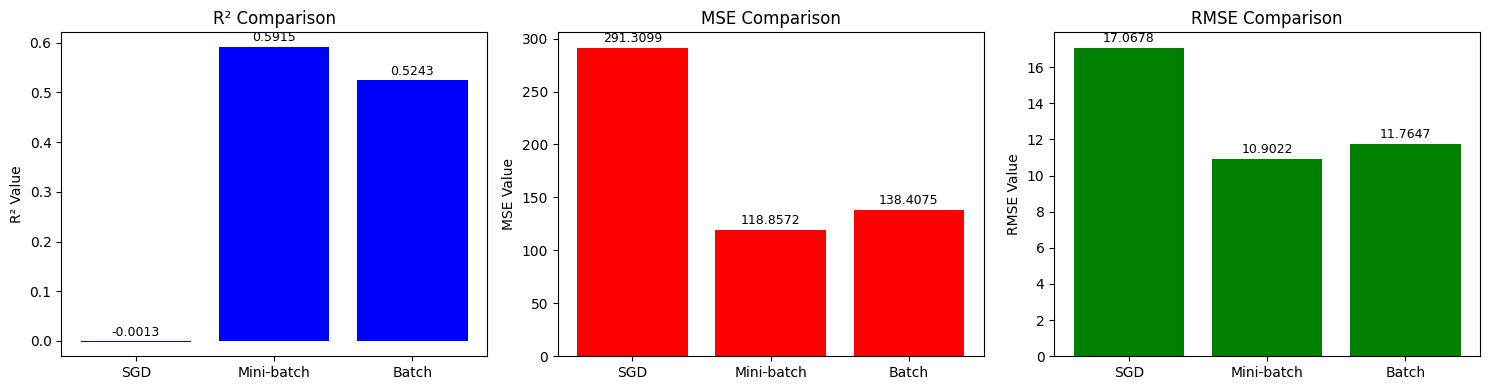

In [8]:

# Lists to store metrics
model_names = []
r2_list = []
mse_list = []
rmse_list = []

for name, model in [("SGD", mlp_sgd), ("Mini-batch", mlp_minibatch), ("Batch", mlp_batch)]:
    # Train the model
    model.fit(X_train, y_train.ravel())

    # Predict on test set
    y_pred = scaler_y.inverse_transform(model.predict(X_test).reshape(-1,1))
    y_true = scaler_y.inverse_transform(y_test)

    # Metrics
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Store metrics
    model_names.append(name)
    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)

    print(f"{name} -> R²: {r2:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f}")

# Function to add values on top of bars
def add_values(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + max(values)*0.01, f"{v:.4f}", ha='center', va='bottom', fontsize=9)

# Plot separate bar charts
plt.figure(figsize=(15,4))

# R² bar chart
ax1 = plt.subplot(1, 3, 1)
bars1 = ax1.bar(model_names, r2_list, color='blue')
ax1.set_title("R² Comparison")
ax1.set_ylabel("R² Value")
add_values(ax1, r2_list)

# MSE bar chart
ax2 = plt.subplot(1, 3, 2)
bars2 = ax2.bar(model_names, mse_list, color='red')
ax2.set_title("MSE Comparison")
ax2.set_ylabel("MSE Value")
add_values(ax2, mse_list)

# RMSE bar chart
ax3 = plt.subplot(1, 3, 3)
bars3 = ax3.bar(model_names, rmse_list, color='green')
ax3.set_title("RMSE Comparison")
ax3.set_ylabel("RMSE Value")
add_values(ax3, rmse_list)

plt.tight_layout()
plt.show()

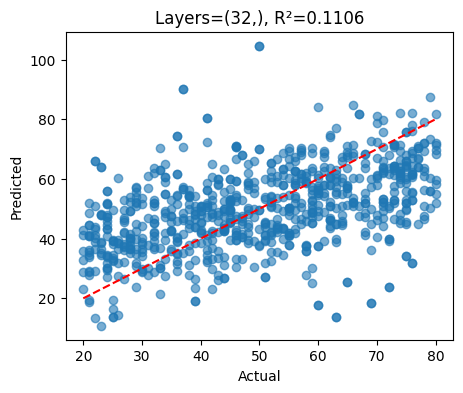

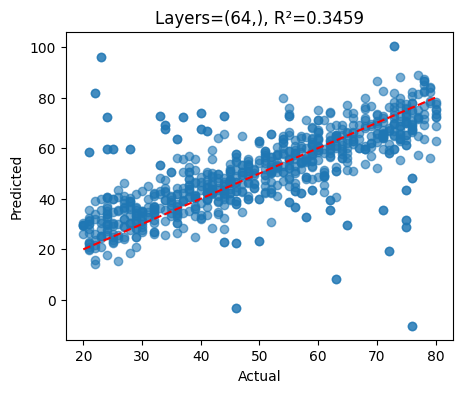

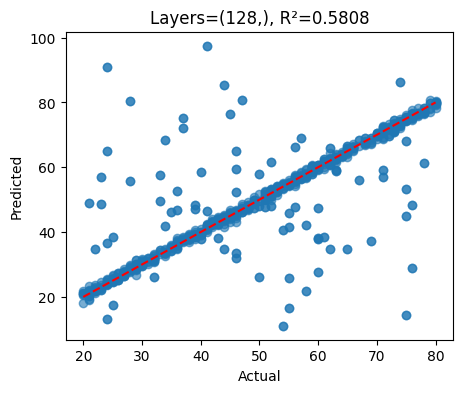

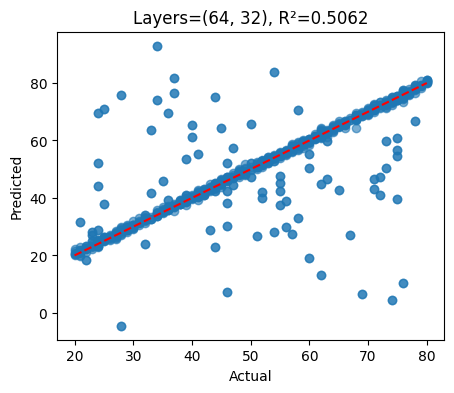

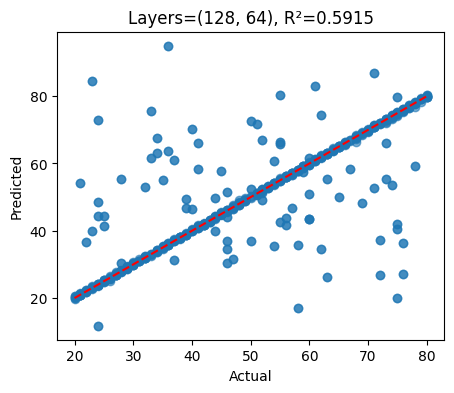

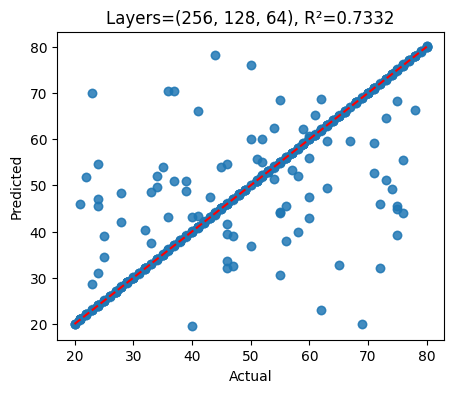

Hidden layer configurations sorted by R²:
Layers: (256, 128, 64), R²: 0.7332, MSE: 77.6207, RMSE: 8.8103
Layers: (128, 64), R²: 0.5915, MSE: 118.8572, RMSE: 10.9022
Layers: (128,), R²: 0.5808, MSE: 121.9634, RMSE: 11.0437
Layers: (64, 32), R²: 0.5062, MSE: 143.6575, RMSE: 11.9857
Layers: (64,), R²: 0.3459, MSE: 190.2947, RMSE: 13.7947
Layers: (32,), R²: 0.1106, MSE: 258.7432, RMSE: 16.0855


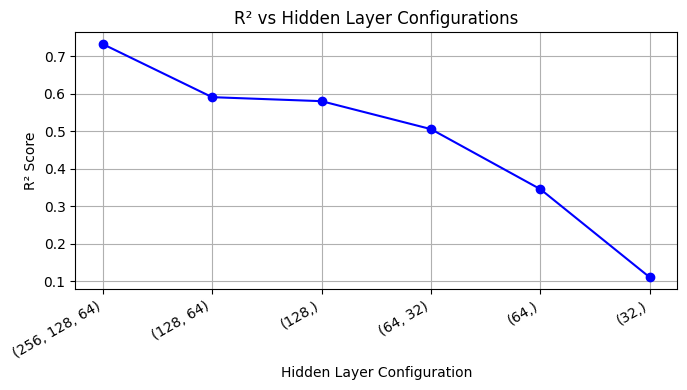

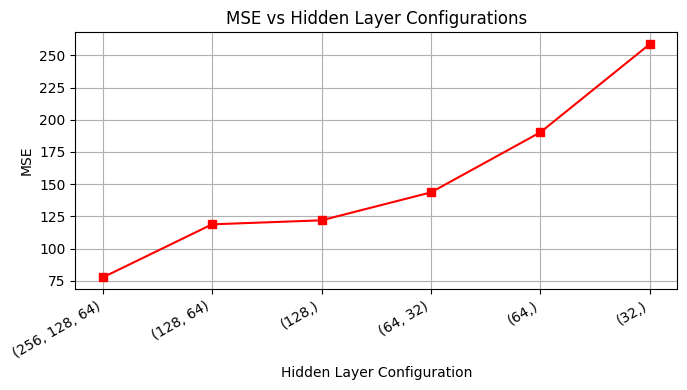

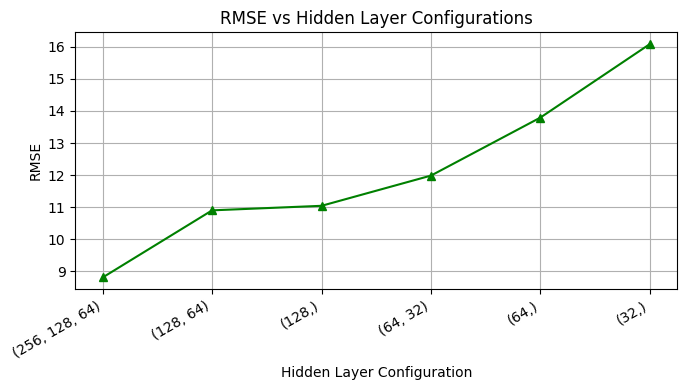

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Define different hidden layer configurations to try
hidden_layer_options = [
    (32,),         # 1 layer, 32 neurons
    (64,),         # 1 layer, 64 neurons
    (128,),        # 1 layer, 128 neurons
    (64, 32),      # 2 layers
    (128, 64),     # 2 layers
    (256, 128, 64) # 3 layers
]

results = []

for layers in hidden_layer_options:
    mlp = MLPRegressor(hidden_layer_sizes=layers,
                       activation='relu',
                       solver='sgd',
                       learning_rate_init=0.01,
                       batch_size=32,      # Mini-batch
                       alpha=0.001,        # L2 regularization
                       max_iter=2000,
                       random_state=42)

    mlp.fit(X_train, y_train.ravel())

    y_pred = scaler_y.inverse_transform(mlp.predict(X_test).reshape(-1,1))
    y_true = scaler_y.inverse_transform(y_test)

    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    results.append((layers, r2, mse, rmse))

    # Plot predicted vs actual for each config
    plt.figure(figsize=(5,4))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Layers={layers}, R²={r2:.4f}")
    plt.show()

# ---- Show results summary ----
results.sort(key=lambda x: x[1], reverse=True)
print("Hidden layer configurations sorted by R²:")
for layers, r2, mse, rmse in results:
    print(f"Layers: {layers}, R²: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# ---- Prepare data for plotting ----
labels = [str(r[0]) for r in results]   # convert layers to strings
r2_scores = [r[1] for r in results]
mse_scores = [r[2] for r in results]
rmse_scores = [r[3] for r in results]

x = np.arange(len(labels))  # numeric positions for x-axis

# ---- R² curve ----
plt.figure(figsize=(7,4))
plt.plot(x, r2_scores, marker='o', color='blue')
plt.xticks(x, labels, rotation=30, ha="right")
plt.xlabel("Hidden Layer Configuration")
plt.ylabel("R² Score")
plt.title("R² vs Hidden Layer Configurations")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- MSE curve ----
plt.figure(figsize=(7,4))
plt.plot(x, mse_scores, marker='s', color='red')
plt.xticks(x, labels, rotation=30, ha="right")
plt.xlabel("Hidden Layer Configuration")
plt.ylabel("MSE")
plt.title("MSE vs Hidden Layer Configurations")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- RMSE curve ----
plt.figure(figsize=(7,4))
plt.plot(x, rmse_scores, marker='^', color='green')
plt.xticks(x, labels, rotation=30, ha="right")
plt.xlabel("Hidden Layer Configuration")
plt.ylabel("RMSE")
plt.title("RMSE vs Hidden Layer Configurations")
plt.grid(True)
plt.tight_layout()
plt.show()


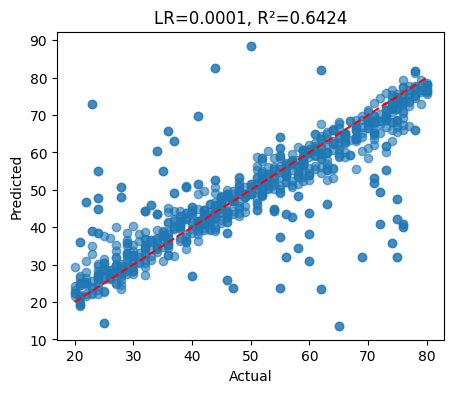

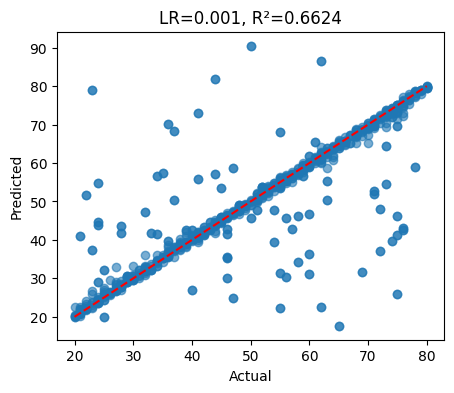

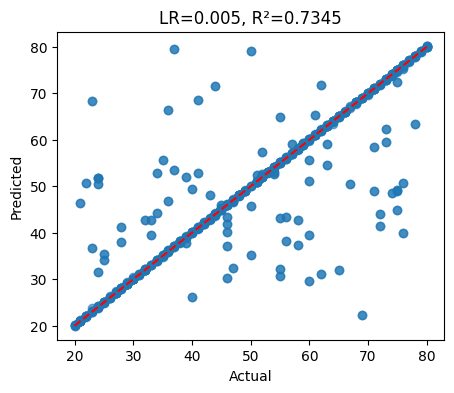

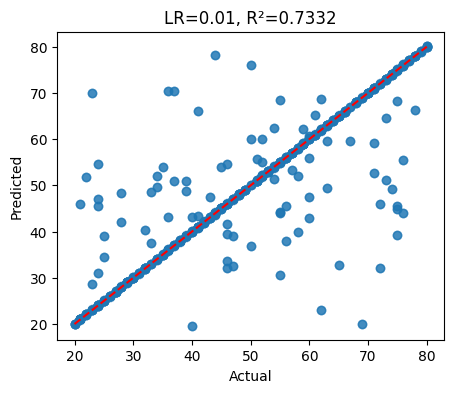

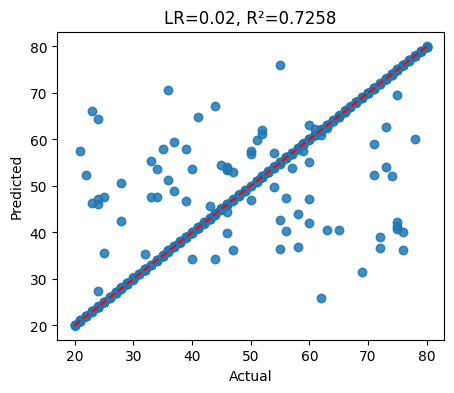

   Learning Rate        R²         MSE       RMSE
2         0.0050  0.734464   77.251968   8.789310
3         0.0100  0.733196   77.620704   8.810261
4         0.0200  0.725756   79.785385   8.932267
1         0.0010  0.662389   98.220604   9.910631
0         0.0001  0.642421  104.029677  10.199494


In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Best hidden layer from previous experiment
best_hidden_layer = (256, 128, 64)

# Learning rates to try
learning_rates = [0.0001, 0.001, 0.005, 0.01, 0.02]

results = []

for lr in learning_rates:
    mlp = MLPRegressor(hidden_layer_sizes=best_hidden_layer,
                       activation='relu',
                       solver='sgd',
                       learning_rate_init=lr,
                       batch_size=32,      # Mini-batch
                       alpha=0.001,        # L2 regularization
                       max_iter=2000,
                       random_state=42)

    mlp.fit(X_train, y_train.ravel())

    y_pred = scaler_y.inverse_transform(mlp.predict(X_test).reshape(-1,1))
    y_true = scaler_y.inverse_transform(y_test)

    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    results.append((lr, r2, mse, rmse))

    # Scatter plot predicted vs actual
    plt.figure(figsize=(5,4))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"LR={lr}, R²={r2:.4f}")
    plt.show()


# Create summary table
results_df = pd.DataFrame(results, columns=['Learning Rate', 'R²', 'MSE', 'RMSE'])
results_df = results_df.sort_values(by='R²', ascending=False)
print(results_df)




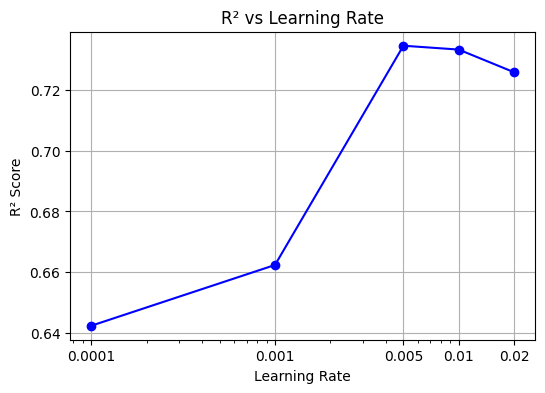

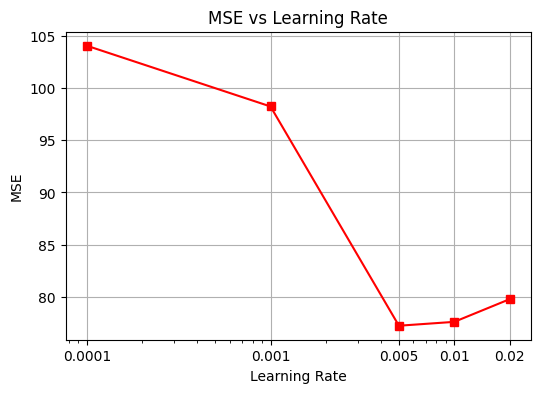

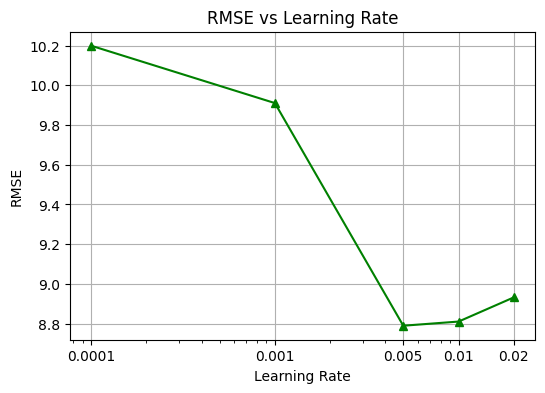

In [11]:
# Sort results by learning rate (first element of each tuple)
results_sorted = sorted(results, key=lambda x: x[0])

# Plot R² vs learning rate
plt.figure(figsize=(6,4))
plt.plot([r[0] for r in results_sorted], [r[1] for r in results_sorted], marker='o', color='blue')
plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("R² Score")
plt.title("R² vs Learning Rate")
plt.grid(True)
plt.xticks([0.0001, 0.001, 0.005, 0.01, 0.02], ['0.0001', '0.001', '0.005', '0.01', '0.02'])
plt.show()

# Plot MSE vs learning rate
plt.figure(figsize=(6,4))
plt.plot([r[0] for r in results_sorted], [r[2] for r in results_sorted], marker='s', color='red')
plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("MSE")
plt.title("MSE vs Learning Rate")
plt.grid(True)
plt.xticks([0.0001, 0.001, 0.005, 0.01, 0.02], ['0.0001', '0.001', '0.005', '0.01', '0.02'])
plt.show()

# Plot RMSE vs learning rate
plt.figure(figsize=(6,4))
plt.plot([r[0] for r in results_sorted], [r[3] for r in results_sorted], marker='^', color='green')
plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("RMSE")
plt.title("RMSE vs Learning Rate")
plt.grid(True)
plt.xticks([0.0001, 0.001, 0.005, 0.01, 0.02], ['0.0001', '0.001', '0.005', '0.01', '0.02'])
plt.show()


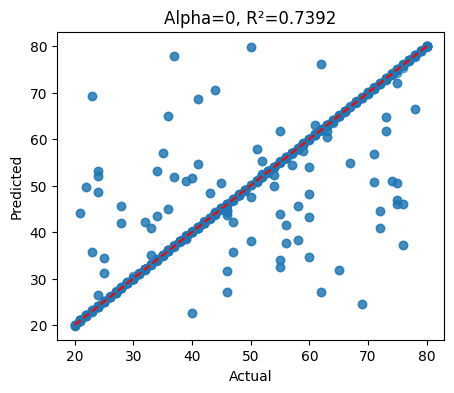

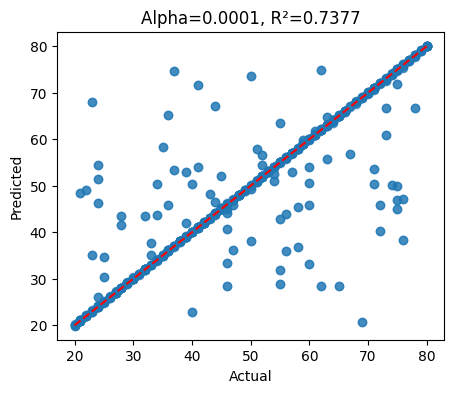

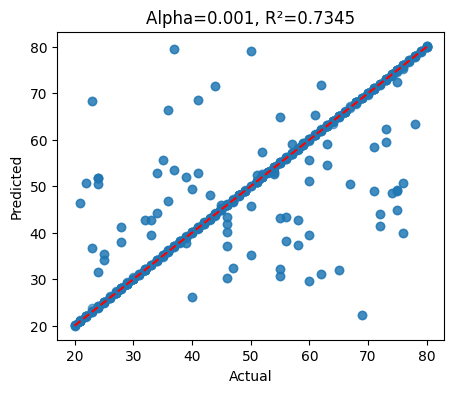

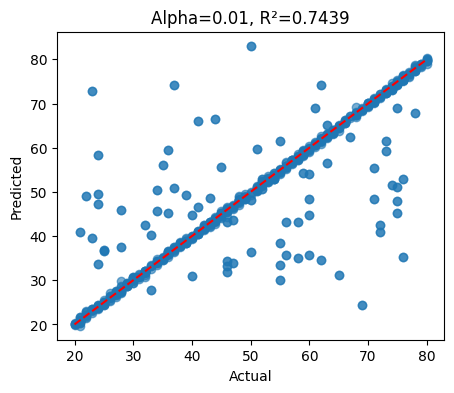

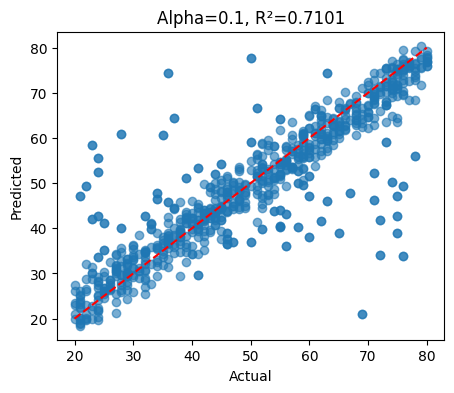

   Alpha (L2)        R²        MSE      RMSE
0      0.0000  0.739159  75.886026  8.711259
1      0.0001  0.737717  76.305366  8.735294
2      0.0010  0.734464  77.251968  8.789310
3      0.0100  0.743943  74.493996  8.630990
4      0.1000  0.710123  84.333294  9.183316


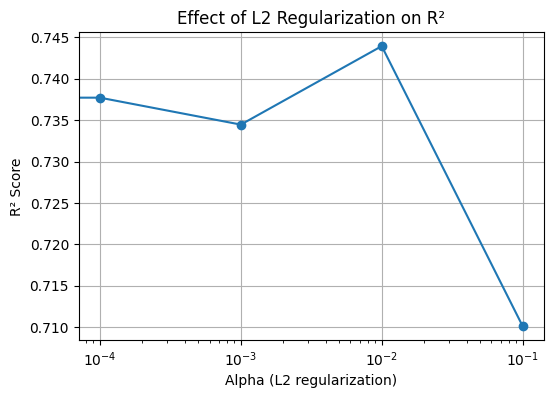

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fixed optimal hidden layer and learning rate
best_hidden_layer = (256, 128, 64)
best_lr = 0.005
batch_size = 32

# L2 regularization values to try
alpha_values = [0, 0.0001, 0.001, 0.01, 0.1]
results = []

for alpha in alpha_values:
    # Train MLP
    mlp = MLPRegressor(
        hidden_layer_sizes=best_hidden_layer,
        activation='relu',
        solver='sgd',
        learning_rate_init=best_lr,
        batch_size=batch_size,
        alpha=alpha,
        max_iter=2000,
        random_state=42
    )
    mlp.fit(X_train, y_train.ravel())

    # Predict and inverse scale
    y_pred = scaler_y.inverse_transform(mlp.predict(X_test).reshape(-1,1))
    y_true = scaler_y.inverse_transform(y_test)

    # Metrics
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    results.append((alpha, r2, mse, rmse))

    # Scatter plot predicted vs actual
    plt.figure(figsize=(5,4))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Alpha={alpha}, R²={r2:.4f}")
    plt.show()

# Display results in a table
results_df = pd.DataFrame(results, columns=['Alpha (L2)', 'R²', 'MSE', 'RMSE'])
print(results_df)

# Plot R² vs alpha
plt.figure(figsize=(6,4))
plt.plot(alpha_values, results_df['R²'], marker='o')
plt.xscale('log')  # L2 values are best visualized in log scale
plt.xlabel("Alpha (L2 regularization)")
plt.ylabel("R² Score")
plt.title("Effect of L2 Regularization on R²")
plt.grid(True)
plt.show()




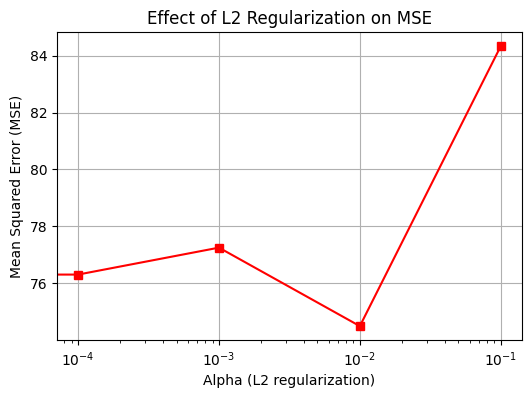

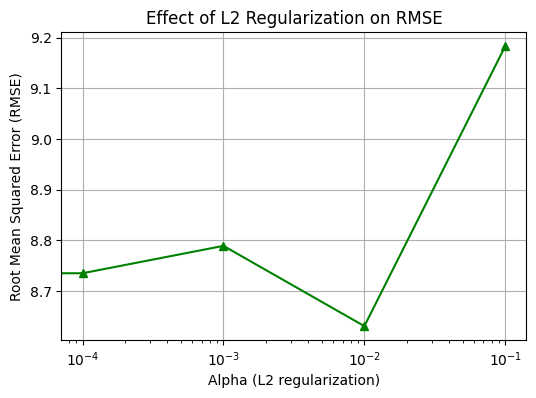

In [13]:
# Plot MSE vs alpha
plt.figure(figsize=(6,4))
plt.plot(alpha_values, results_df['MSE'], marker='s', color='red')
plt.xscale('log')
plt.xlabel("Alpha (L2 regularization)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of L2 Regularization on MSE")
plt.grid(True)
plt.show()

# Plot RMSE vs alpha
plt.figure(figsize=(6,4))
plt.plot(alpha_values, results_df['RMSE'], marker='^', color='green')
plt.xscale('log')
plt.xlabel("Alpha (L2 regularization)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Effect of L2 Regularization on RMSE")
plt.grid(True)
plt.show()